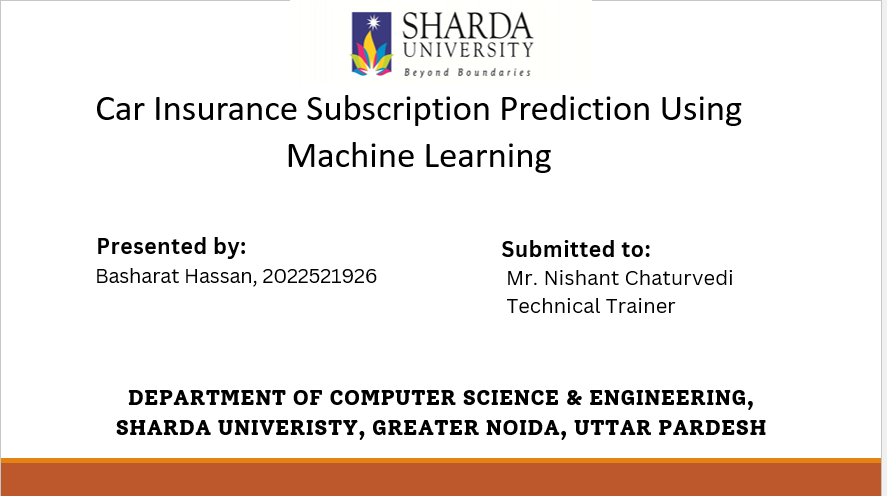

# Problem Statement
An insurance company wants to predict whether a customer is likely to purchase a car insurance policy based on their demographic, financial, and contact-related information. Accurately identifying potential buyers will help the company improve its marketing strategies and optimize customer outreach.

# Objective

To analyze and understand patterns in customer data that influence car insurance subscription decisions.

To build a classification model that predicts the likelihood of a customer subscribing to car insurance.

To evaluate model performance and identify the most influential factors contributing to successful conversions.

# Data Description
The dataset contains information about customers including:

* Demographic Features: Age, Job, Marital, Education, Default

* Financial Information: Balance, HHInsurance, CarLoan

* Contact Information: Communication, LastContactDay, LastContactMonth, CallStart, CallEnd

* Campaign Interaction Data: NoOfContacts, DaysPassed, PrevAttempts, Outcome

* Target Variable: CarInsurance (1 = Subscribed, 0 = Not Subscribed)

# Importing the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 1. Data Exploration and Cleaning

## Task 1: Load the dataset into a pandas DataFrame and display the first few rows.

In [2]:
df = pd.read_csv('carInsurance.csv')

In [3]:
print("First 5 Rows:")
df.head()

First 5 Rows:


,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [4]:
print("Last 5 Rows:")
df.tail()

Last 5 Rows:


,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
3995,3996,28,technician,single,tertiary,0,0,1,0,cellular,25,may,1,40,2,failure,17:46:28,17:50:57,1
3996,3997,49,admin.,divorced,secondary,0,124,1,1,cellular,29,jul,19,-1,0,NaN,14:49:16,14:51:21,0
3997,3998,27,admin.,single,secondary,0,-400,0,1,cellular,8,jul,1,-1,0,NaN,12:19:03,12:23:53,0
3998,3999,36,entrepreneur,single,tertiary,0,658,1,0,cellular,29,jan,1,227,3,failure,11:27:35,11:29:14,0
3999,4000,45,services,married,primary,0,137,1,0,NaN,9,may,2,-1,0,NaN,13:31:48,13:36:22,0


In [5]:
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (4000, 19)


In [6]:
print("Data Types of Each Feature:")
print(df.dtypes)

Data Types of Each Feature:
Id                   int64
Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
Outcome             object
CallStart           object
CallEnd             object
CarInsurance         int64
dtype: object


### Observations
There are some object type in the dataset will have to encode them later

In [7]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  

### Observations
there are null vlaues in Outcome, Job, Education, Communication columns will have to fix them

## Task 2: Summarize the dataset by providing basic statistics (mean, median, mode, standard deviation, etc.).


In [8]:
print("Statistical Summary of Target Feature:")
print(df['CarInsurance'].describe())

Statistical Summary of Target Feature:
count    4000.000000
mean        0.401000
std         0.490162
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: CarInsurance, dtype: float64


### Observations
* The total count is 4000 and hte mean in 0.40 

In [9]:
print("Unique Values in Target Feature:")
print(df["CarInsurance"].unique())
print(df['CarInsurance'].value_counts())

Unique Values in Target Feature:
[0 1]
CarInsurance
0    2396
1    1604
Name: count, dtype: int64


### Observations
* As looking at the target variable it is slightly imbalanced with:
* Class 0 (Did not subscribe): 2396 samples → 59.9%
* Class 1 (Subscribed): 1604 samples → 40.1%

This may affect model performance—some models might lean toward predicting the majority class (0) more often.
So, we must consider using the:
* Consider using stratified train-test splits to maintain the class ratio.
* Evaluate models using precision, recall, F1-score, and confusion matrix, not just accuracy.
* If needed, techniques like class weighting, SMOTE, or undersampling can be applied later.

In [10]:
print("Statistical Summary of Dataset:")
df.describe()

Statistical Summary of Dataset:


,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


### Observations
The mean of CarInsurance is 0.40, indicating that 40% of customers in the dataset subscribed to car insurance.

## Task 3: Identify and handle missing values. Explain the chosen method for handling them.

In [11]:
print("Null Values in Dataset:")
print(df.isnull().sum())

Null Values in Dataset:
Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64


### Observations
There are no null values in Job, Education, Communication, Outcome will have fix them later.

## Task 4: Identify and handle duplicate rows if any.

In [12]:
duplicate_rows = df[df.duplicated()]
print(f"Duplicate Rows Found: {len(duplicate_rows)}")

Duplicate Rows Found: 0


### Observations
There are no duplicate rows in the dataset

### Drop columns

In [13]:
# Drop Id and Outcome due to low predictive value / high missingness
# df.drop(columns=['Id', 'Outcome'], inplace=True)

# Optional: Drop CallStart and CallEnd if not using call duration
# df.drop(columns=['CallStart', 'CallEnd'], inplace=True)

df.drop(columns=['Outcome','CallStart','CallEnd'], inplace=True)

In [14]:
print("\nData types:")
print(df.dtypes)


Data types:
Id                   int64
Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
CarInsurance         int64
dtype: object


### Checking for anomalies or wrong entries

In [15]:
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    print(f'Unique values in column "{col}":')
    print(df[col].unique())
    print()


Unique values in column "Job":
['management' 'blue-collar' 'student' 'technician' 'admin.' 'services'
 'self-employed' 'retired' nan 'housemaid' 'entrepreneur' 'unemployed']

Unique values in column "Marital":
['single' 'married' 'divorced']

Unique values in column "Education":
['tertiary' 'primary' 'secondary' nan]

Unique values in column "Communication":
['telephone' nan 'cellular']

Unique values in column "LastContactMonth":
['jan' 'may' 'jun' 'mar' 'nov' 'jul' 'aug' 'sep' 'apr' 'feb' 'oct' 'dec']



### Checking for outliers and their authencity

In [16]:
df[df.isnull().sum(axis=1)>0]

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,0
7,8,35,management,divorced,tertiary,0,538,1,0,NaN,12,may,4,-1,0,0
13,14,38,self-employed,divorced,secondary,0,2674,1,0,NaN,19,jun,2,-1,0,0
14,15,25,services,single,NaN,0,2022,0,0,cellular,29,jul,8,97,12,1
20,21,57,blue-collar,married,secondary,0,773,1,1,NaN,18,jun,8,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,3979,44,technician,divorced,secondary,0,982,1,0,NaN,20,may,3,-1,0,1
3984,3985,28,services,single,secondary,0,2954,1,0,NaN,28,may,2,-1,0,0
3991,3992,55,unemployed,single,tertiary,0,1513,1,0,NaN,8,may,1,-1,0,0
3994,3995,48,blue-collar,married,secondary,0,1,0,0,NaN,5,may,3,-1,0,0


In [17]:
df.isnull().sum()

Id                    0
Age                   0
Job                  19
Marital               0
Education           169
Default               0
Balance               0
HHInsurance           0
CarLoan               0
Communication       902
LastContactDay        0
LastContactMonth      0
NoOfContacts          0
DaysPassed            0
PrevAttempts          0
CarInsurance          0
dtype: int64

In [18]:
df.isnull().sum()/len(df)*100

Id                   0.000
Age                  0.000
Job                  0.475
Marital              0.000
Education            4.225
Default              0.000
Balance              0.000
HHInsurance          0.000
CarLoan              0.000
Communication       22.550
LastContactDay       0.000
LastContactMonth     0.000
NoOfContacts         0.000
DaysPassed           0.000
PrevAttempts         0.000
CarInsurance         0.000
dtype: float64

### Let us check for outliers in the numeric columns

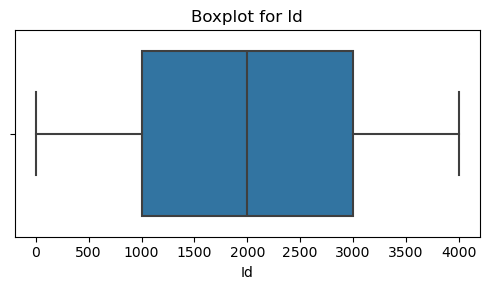

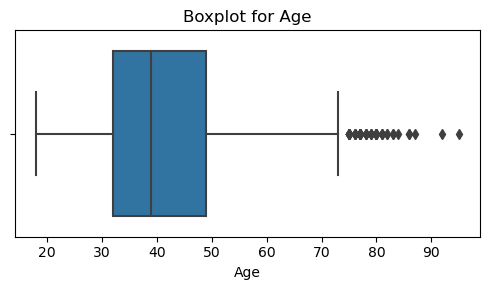

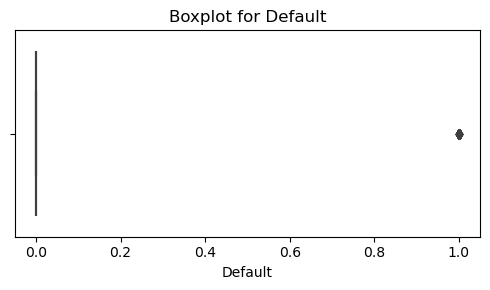

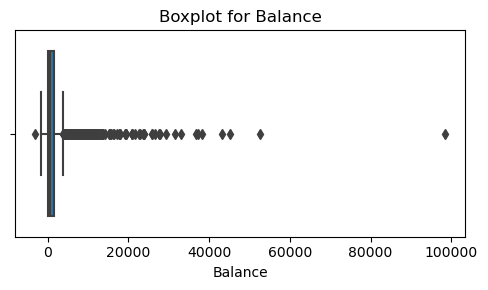

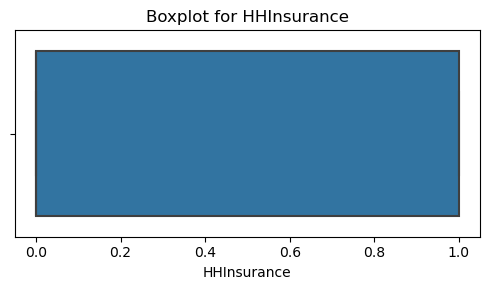

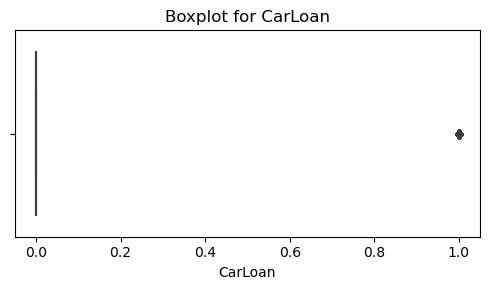

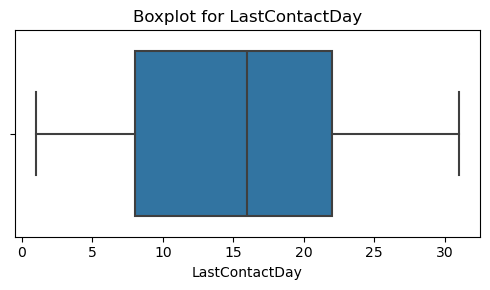

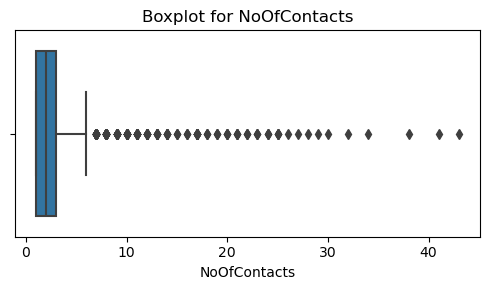

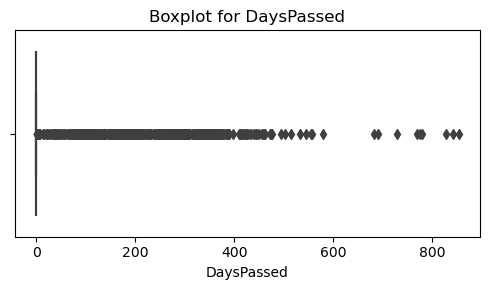

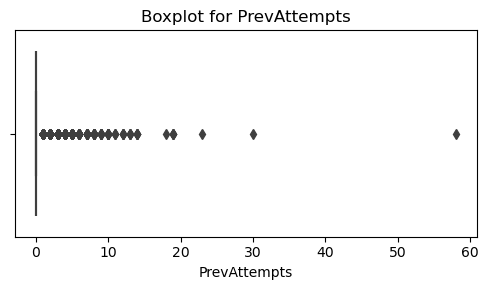

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns='CarInsurance').columns

for col in numeric_cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


### Observations
* Numeric Columns with outliers are: PrevAttempts, DaysPassed,NoOfContacts, CarLoan, Balance, Default, Age, 
* Numeric Columns witout outlier are: Id, HHInsurnace, LastContactDay.

### Let us check for outliers in the categorical column

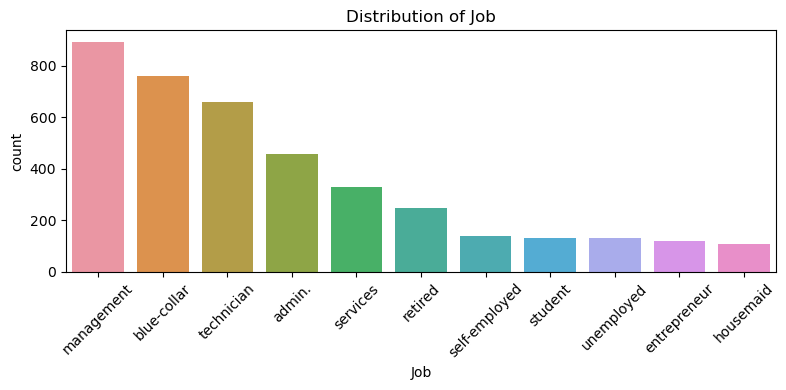

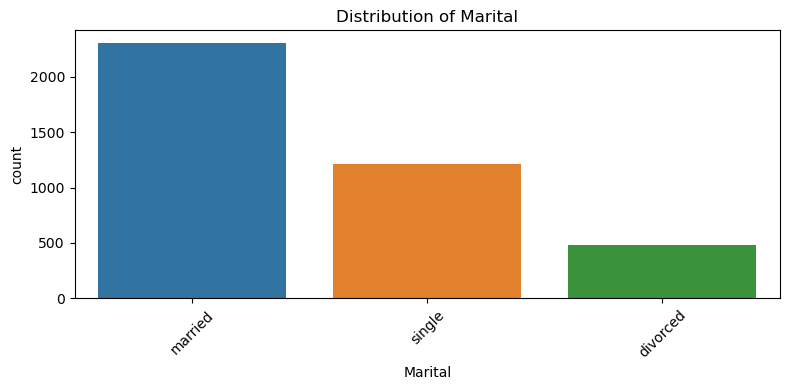

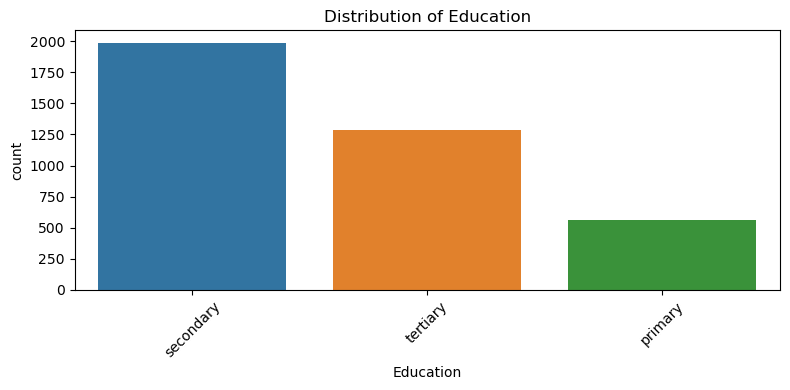

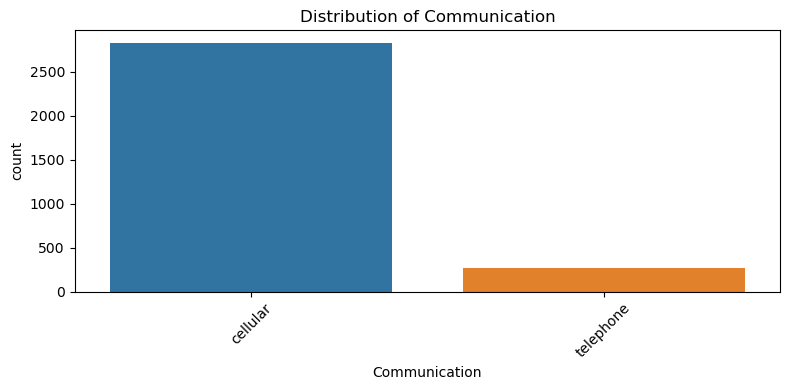

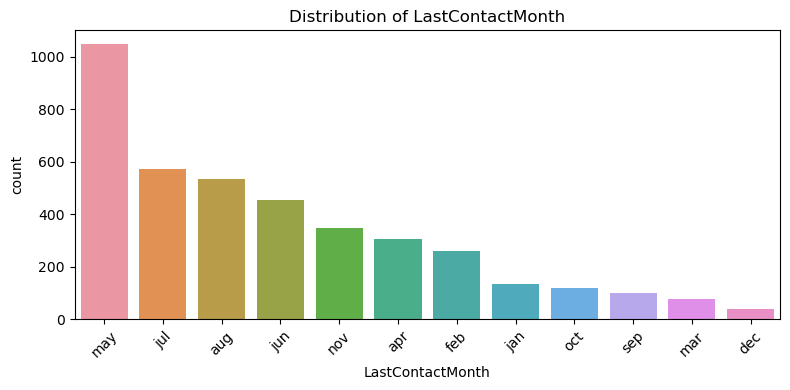

In [20]:
# Select categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Plot count plots
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Observations
* For job Management is the most occupied and housemaid the least

In [21]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

# Apply to all numeric columns (excluding target)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns='CarInsurance').columns
df = remove_outliers_iqr(df, numeric_cols)


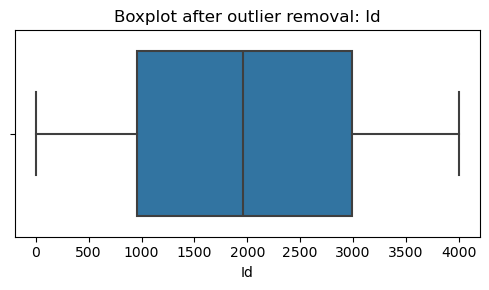

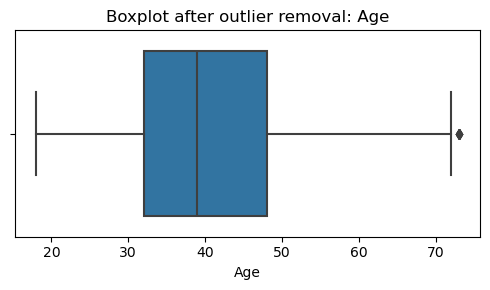

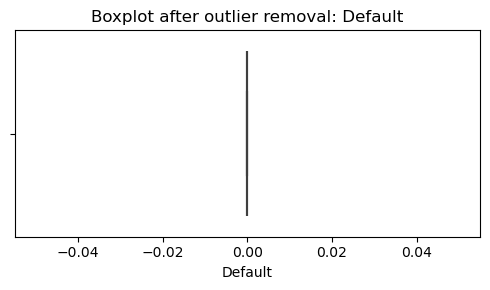

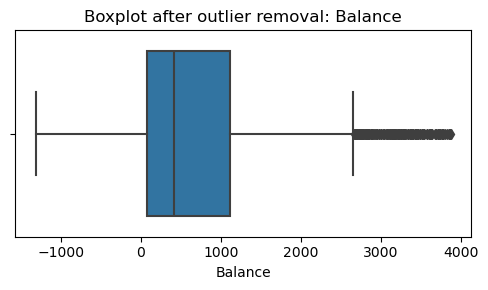

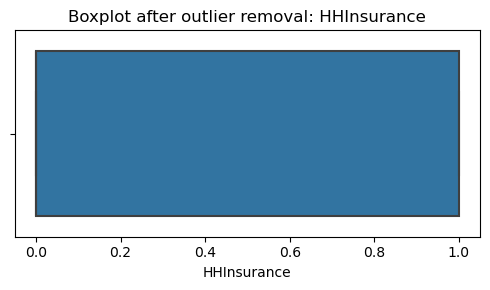

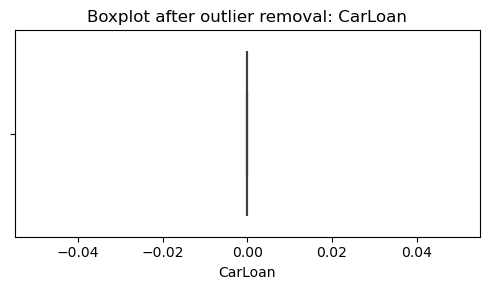

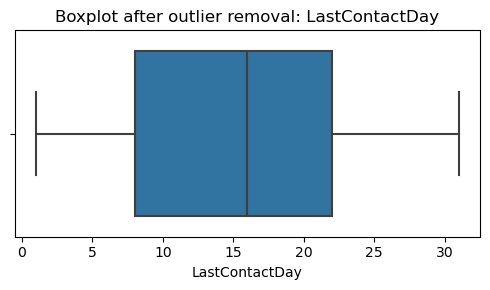

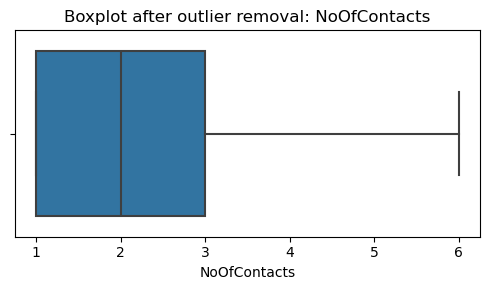

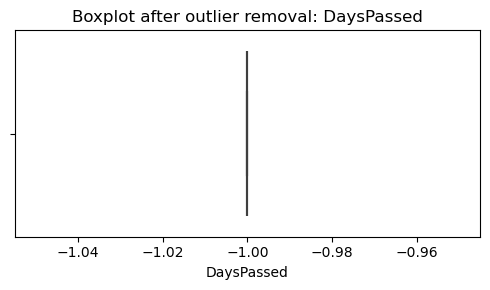

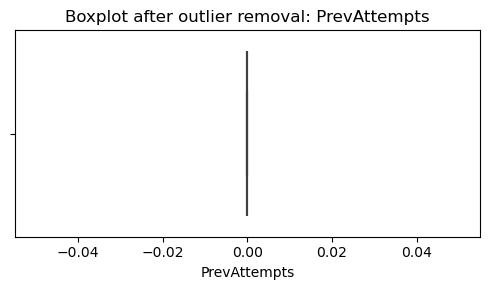

In [22]:
# Visualize again to confirm no extreme points
for col in numeric_cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot after outlier removal: {col}')
    plt.tight_layout()
    plt.show()


In [23]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers remaining")


Id: 0 outliers remaining
Age: 6 outliers remaining
Default: 0 outliers remaining
Balance: 158 outliers remaining
HHInsurance: 0 outliers remaining
CarLoan: 0 outliers remaining
LastContactDay: 0 outliers remaining
NoOfContacts: 0 outliers remaining
DaysPassed: 0 outliers remaining
PrevAttempts: 0 outliers remaining


In [24]:
def reduce_rare_categories(df, col, threshold=0.01):
    freq = df[col].value_counts(normalize=True)
    rare_labels = freq[freq < threshold].index
    df[col] = df[col].apply(lambda x: 'Other' if x in rare_labels else x)
    return df

# Apply to all object columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df = reduce_rare_categories(df, col)


In [25]:
for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print()


Value counts for Job:
Job
management       446
blue-collar      436
technician       345
admin.           251
services         182
retired          117
housemaid         78
self-employed     77
student           72
unemployed        68
entrepreneur      60
Name: count, dtype: int64

Value counts for Marital:
Marital
married     1230
single       644
divorced     268
Name: count, dtype: int64

Value counts for Education:
Education
secondary    1061
tertiary      673
primary       322
Name: count, dtype: int64

Value counts for Communication:
Communication
cellular     1394
telephone     107
Name: count, dtype: int64

Value counts for LastContactMonth:
LastContactMonth
may      628
aug      320
jul      290
jun      282
apr      162
nov      136
feb      127
jan       65
oct       47
mar       41
sep       29
Other     15
Name: count, dtype: int64



In [26]:
# Total and % of missing values
missing_info = df.isnull().sum().to_frame(name='MissingCount')
missing_info['MissingPercent'] = 100 * missing_info['MissingCount'] / len(df)
missing_info = missing_info[missing_info['MissingCount'] > 0]
print(missing_info)


               MissingCount  MissingPercent
Job                      10        0.466853
Education                86        4.014939
Communication           641       29.925303


In [27]:
# Impute with mode
df['Job'].fillna(df['Job'].mode()[0], inplace=True)
df['Education'].fillna(df['Education'].mode()[0], inplace=True)
df['Communication'].fillna(df['Communication'].mode()[0], inplace=True)

### If it were a numeric column with null values then
df['column_name'].fillna(df['column_name'].median(), inplace=True) # for outliers\
df['column_name'].fillna(df['column_name'].mean(), inplace=True)  # no outliers

In [28]:
print(df.isnull().sum())


Id                  0
Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
CarInsurance        0
dtype: int64


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2142 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                2142 non-null   int64 
 1   Age               2142 non-null   int64 
 2   Job               2142 non-null   object
 3   Marital           2142 non-null   object
 4   Education         2142 non-null   object
 5   Default           2142 non-null   int64 
 6   Balance           2142 non-null   int64 
 7   HHInsurance       2142 non-null   int64 
 8   CarLoan           2142 non-null   int64 
 9   Communication     2142 non-null   object
 10  LastContactDay    2142 non-null   int64 
 11  LastContactMonth  2142 non-null   object
 12  NoOfContacts      2142 non-null   int64 
 13  DaysPassed        2142 non-null   int64 
 14  PrevAttempts      2142 non-null   int64 
 15  CarInsurance      2142 non-null   int64 
dtypes: int64(11), object(5)
memory usage: 284.5+ KB


## - Task 5: Convert categorical variables to numerical values using appropriate encoding techniques (e.g., one-hot encoding, label encoding).

### Label Encoding was used for: Marital, Education
* These columns have a few values, and assigning them simple numbers is fine. Label encoding turns categories like single, married, etc., into 0, 1, 2, etc.

### One-Hot Encoding was used for: Job, Communication, LastContactMonth
* These columns have multiple categories with no natural order. One-hot encoding creates separate columns for each category so the model doesn’t assume any ranking between them.

In [33]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Copy the dataset to avoid changing original
df_encoded = df.copy()

# Label Encoding for Marital and Education
label_cols = ['Marital', 'Education']
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# One-Hot Encoding for other categorical columns
one_hot_cols = ['Job', 'Communication', 'LastContactMonth']
df_encoded = pd.get_dummies(df_encoded, columns=one_hot_cols, drop_first=True)

# Check result
print(df_encoded.dtypes)
df_encoded.head()


Id                         int64
Age                        int64
Marital                    int32
Education                  int32
Default                    int64
Balance                    int64
HHInsurance                int64
CarLoan                    int64
LastContactDay             int64
NoOfContacts               int64
DaysPassed                 int64
PrevAttempts               int64
CarInsurance               int64
Job_blue-collar             bool
Job_entrepreneur            bool
Job_housemaid               bool
Job_management              bool
Job_retired                 bool
Job_self-employed           bool
Job_services                bool
Job_student                 bool
Job_technician              bool
Job_unemployed              bool
Communication_telephone     bool
LastContactMonth_apr        bool
LastContactMonth_aug        bool
LastContactMonth_feb        bool
LastContactMonth_jan        bool
LastContactMonth_jul        bool
LastContactMonth_jun        bool
LastContac

,Id,Age,Marital,Education,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,...,LastContactMonth_aug,LastContactMonth_feb,LastContactMonth_jan,LastContactMonth_jul,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep
0,1,32,2,2,0,1218,1,0,28,2,...,False,False,True,False,False,False,False,False,False,False
1,2,32,1,0,0,1156,1,0,26,5,...,False,False,False,False,False,False,True,False,False,False
3,4,25,2,0,0,373,1,0,11,2,...,False,False,False,False,False,False,True,False,False,False
4,5,30,1,2,0,2694,0,0,3,1,...,False,False,False,False,True,False,False,False,False,False
6,7,37,2,2,0,1000,1,0,17,1,...,False,False,False,False,False,True,False,False,False,False


In [35]:
# to convert bool to int
# df_encoded = df_encoded.astype({col: 'int' for col in df_encoded.select_dtypes('bool').columns})

In [37]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Check how many negative values each numeric column has
negative_counts = (numeric_df < 0).sum()
print(negative_counts)


Id                   0
Age                  0
Default              0
Balance            131
HHInsurance          0
CarLoan              0
LastContactDay       0
NoOfContacts         0
DaysPassed        2142
PrevAttempts         0
CarInsurance         0
dtype: int64


### Observations
Balance: Contains some negative values, possibly indicating overdrawn or debt situations. These should be assessed for domain relevance and may need cleaning or capping.

DaysPassed: A large number of entries have -1, which likely indicates that the customer was never contacted before. This value appears to be a placeholder rather than an error.

All other numeric columns: No negative values were found, suggesting valid data ranges.

## Check for information of the features of the dataset after cleaning

In [39]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2142 entries, 0 to 3999
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Id                       2142 non-null   int64
 1   Age                      2142 non-null   int64
 2   Marital                  2142 non-null   int32
 3   Education                2142 non-null   int32
 4   Default                  2142 non-null   int64
 5   Balance                  2142 non-null   int64
 6   HHInsurance              2142 non-null   int64
 7   CarLoan                  2142 non-null   int64
 8   LastContactDay           2142 non-null   int64
 9   NoOfContacts             2142 non-null   int64
 10  DaysPassed               2142 non-null   int64
 11  PrevAttempts             2142 non-null   int64
 12  CarInsurance             2142 non-null   int64
 13  Job_blue-collar          2142 non-null   bool 
 14  Job_entrepreneur         2142 non-null   bool 
 15  Job_house

# 2. Data Visualization

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

### Task 6: Create visualizations to understand the distribution of numerical features (e.g., histograms, box plots).

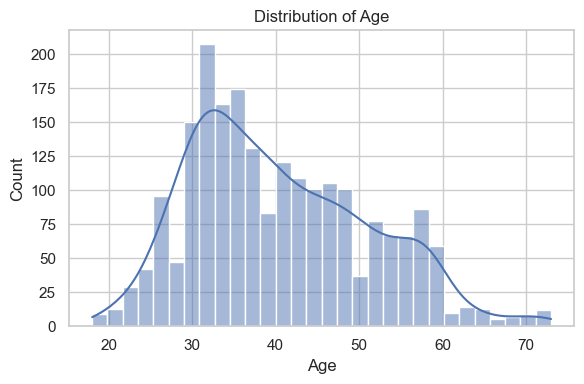

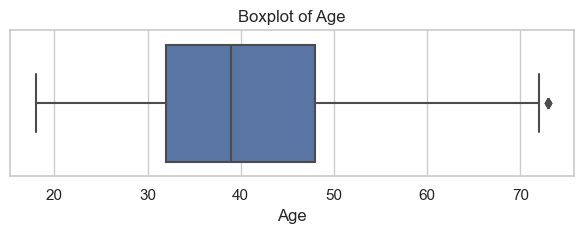

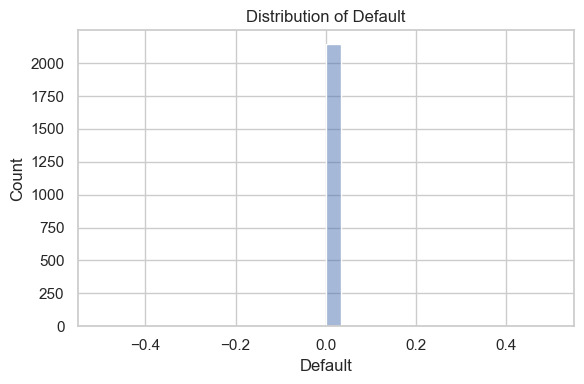

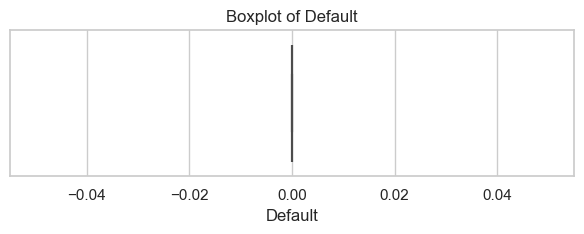

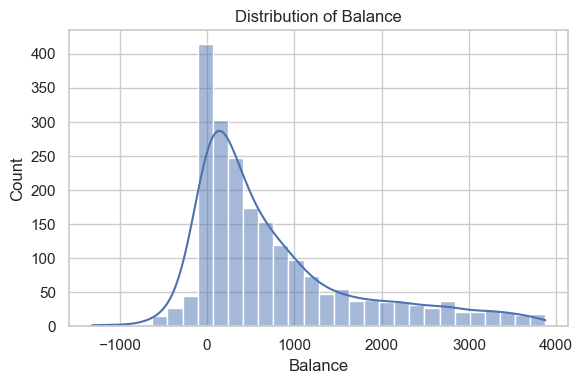

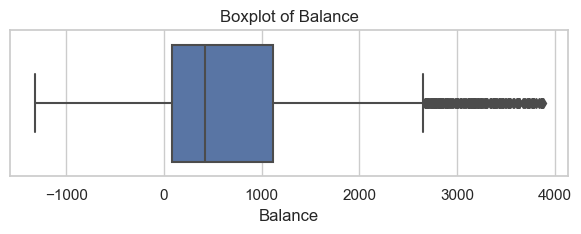

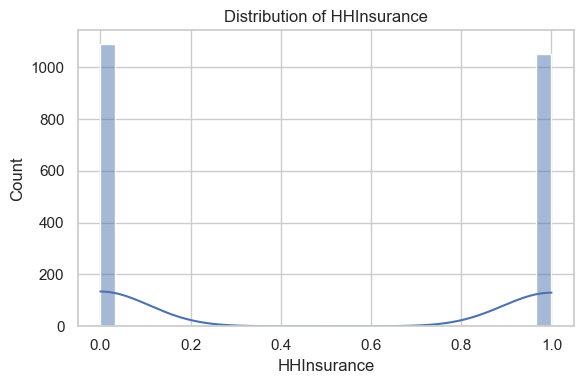

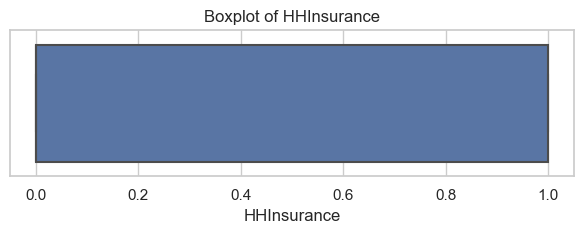

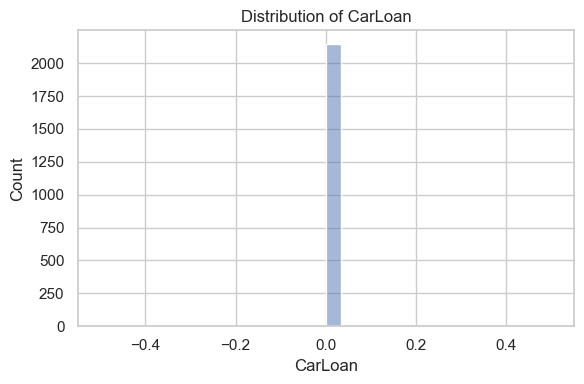

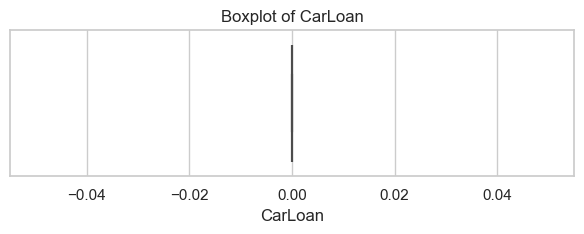

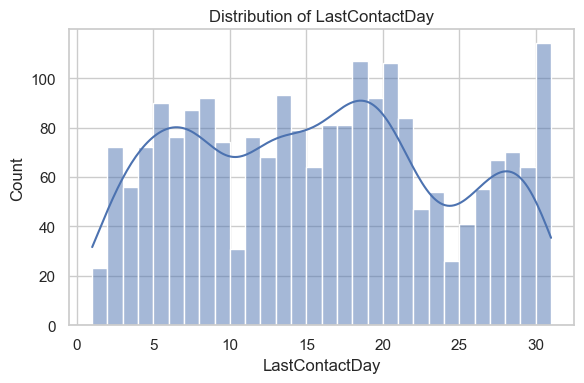

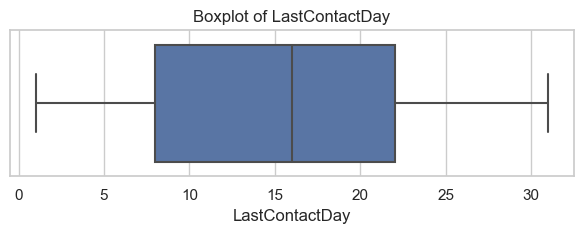

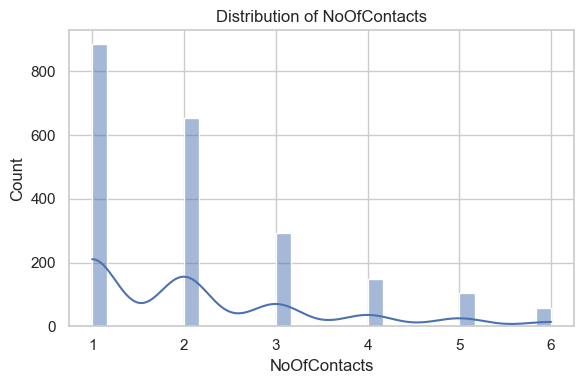

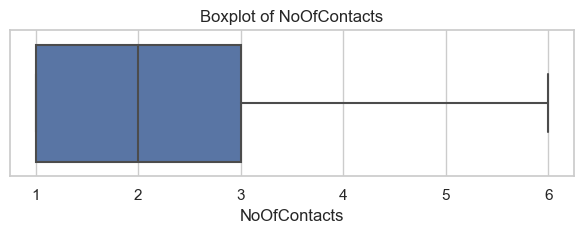

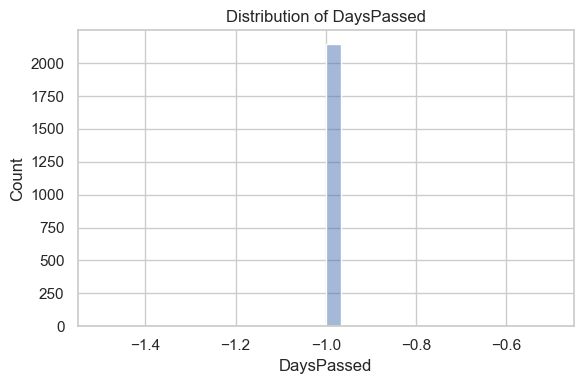

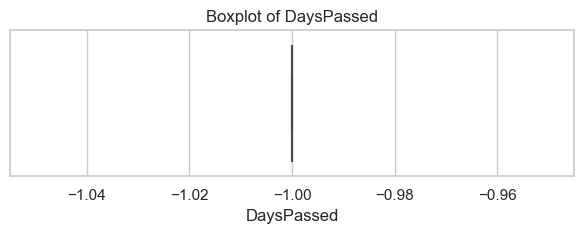

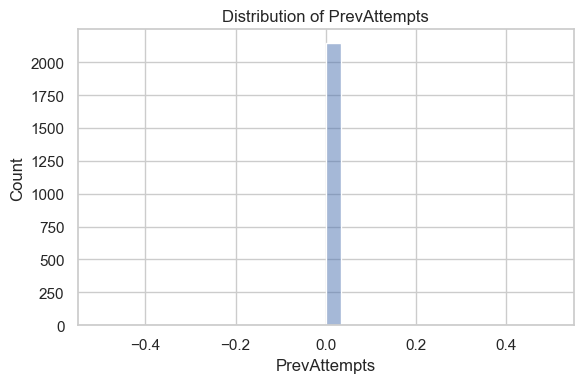

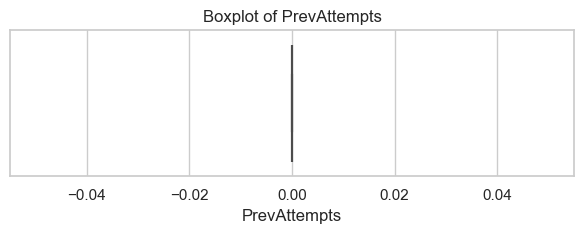

In [44]:
# Use the encoded DataFrame
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).drop(columns=['Id', 'CarInsurance']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_encoded[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 2.5))
    sns.boxplot(x=df_encoded[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


### Observations from Distribution and Box Plots of Numerical Features

1. **Age**
   - The distribution of `Age` is **right-skewed**, with most individuals in the **30–45** age range.
   - Boxplot shows a few **outliers above 65**, but overall spread is reasonable.

1. **Default**
   - The `Default` feature is **binary** with almost all values as **0**, suggesting very few users have credit default.
   - The feature lacks variance and may have **limited predictive power**.

1. **Balance**
   - The distribution is **highly right-skewed**, with many customers having a balance near **0–500**.
   - Boxplot indicates several **outliers**, with some balances extending above **3500**.
   - The spread is large, suggesting possible normalization or transformation.

1. **HHInsurance**
   - Binary feature with nearly equal distribution between **0** and **1**, indicating a **balanced feature**.
   - No outliers are present, and the feature can be directly used for modeling.

1. **CarLoan**
   - Another binary feature like `Default`, dominated by **0s**.
   - Limited variance observed in both histogram and boxplot.

1. **LastContactDay**
   - Fairly **uniform distribution** from day 1 to 31, as expected for a date-related feature.
   - Boxplot confirms a **wide, evenly spread range**, with no visible outliers.

1. **NoOfContacts**
   - Most users received **1 or 2 contacts**, with frequency dropping sharply for higher values.
   - Right-skewed distribution; boxplot shows slight outliers for contacts above 4.

1. **DaysPassed**
   - Appears to be a **constant value** (around -1), offering **no variance**.
   - Should be reviewed for removal as it may not contribute to the model.

1. **PrevAttempts**
   - Also appears to be **constant (0)** across all observations.
   - Like `DaysPassed`, this feature shows **no variability** and is likely **uninformative**.


### Task 8: Generate correlation heatmaps to identify relationships between numerical features.

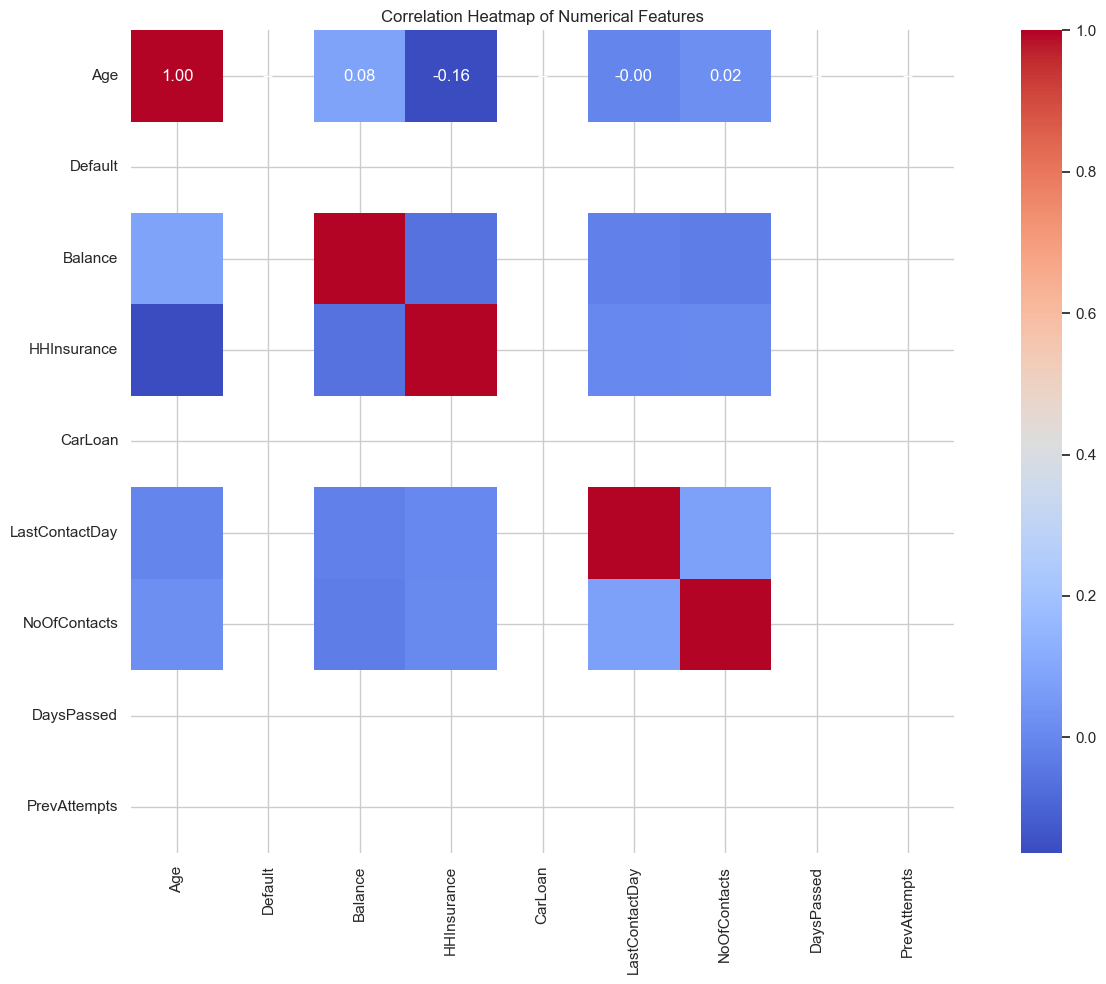

In [45]:
# Select numerical features excluding Id and CarInsurance
numeric_features = df_encoded.select_dtypes(include=['int64', 'float64']).drop(columns=['Id', 'CarInsurance'])

# Compute the correlation matrix
corr_matrix = numeric_features.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


### Observations from Correlation Heatmap (Car Insurance Prediction)

1. **Low Overall Correlation**  
   Most numerical features have **low correlation** with one another, indicating limited multicollinearity in the dataset. This is generally favorable for models like Logistic Regression.

1. **Age and Balance**  
   - `Age` has a weak **positive correlation** with `Default` (0.08) and a **negative correlation** with `Balance` (-0.16).
   - These low values suggest age has minimal linear influence on other features.

1. **Balance and HHInsurance**  
   - A **strong positive correlation** is observed between `Balance` and `HHInsurance`.
   - This suggests that individuals with household insurance tend to have higher account balances.

1. **LastContactDay and NoOfContacts**  
   - A noticeable **positive correlation** exists between `LastContactDay` and `NoOfContacts`.
   - This might indicate that contacts occurring later in the campaign were more frequent or aggressive.

1. **Insignificant Correlation for Some Features**  
   - Features such as `CarLoan`, `DaysPassed`, and `PrevAttempts` show **minimal or no strong correlations** with any other feature in the heatmap.
   - These features may have an independent influence on the target and can be important in tree-based models.

1. **Diagonal Elements = 1**  
   - The diagonal values are all 1.0 as expected, since each feature is perfectly correlated with itself.

1. **Implication for Modeling**  
   - Since there's no dominant multicollinearity, most features can be retained for predictive modeling.
   - However, domain-specific feature selection or dimensionality reduction may still improve performance.


### Task 9: Use pair plots to visualize relationships between features.


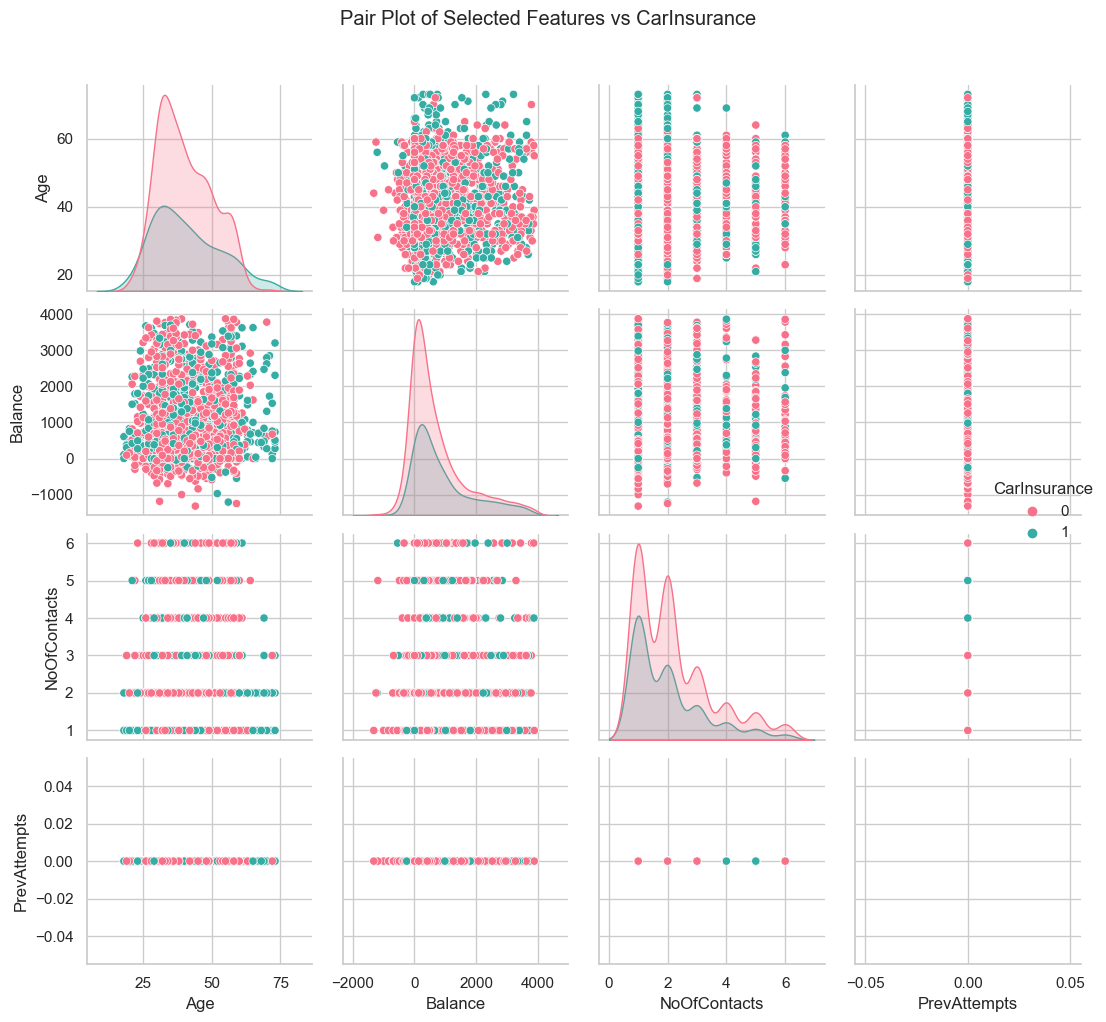

In [46]:
# Add target column back for plotting
df_plot = df_encoded.copy()
df_plot['CarInsurance'] = df['CarInsurance']

# Choose important features for pairplot (you can change based on your correlation heatmap)
selected_features = ['Age', 'Balance', 'NoOfContacts', 'PrevAttempts', 'CarInsurance']

# Plot pairplot
sns.pairplot(df_plot[selected_features], hue='CarInsurance', palette='husl')
plt.suptitle('Pair Plot of Selected Features vs CarInsurance', y=1.02)
plt.tight_layout()
plt.show()


### Observations from Pair Plot (Car Insurance Prediction)

1. **Class Distribution**  
   The pair plot shows two classes for the target variable `CarInsurance`:
   - Class `0` (did not buy insurance) – represented in red.
   - Class `1` (bought insurance) – represented in teal.

1. **Age vs CarInsurance**  
   - Individuals who purchased car insurance (class 1) tend to be in the **30–60 age range**.
   - Very young and very old age groups are less likely to purchase insurance.

1. **Balance vs CarInsurance**  
   - Customers with **higher account balances** are slightly more inclined to buy car insurance.
   - However, the relationship is not strongly separable, as both classes are spread across the balance range.

1. **NoOfContacts vs CarInsurance**  
   - A trend is observed where **more contacts** correlate with a higher likelihood of purchase.
   - Most insurance buyers received **2 or more calls**, suggesting repeated contact increases success.

1. **PrevAttempts vs CarInsurance**  
   - All points lie on a flat line, likely indicating that the feature has a **single constant value** (possibly all zero), hence no variance.
   - This feature may be **uninformative** for prediction and can be considered for removal.

1. **Feature Distributions**  
   - **Kernel Density Estimations (KDEs)** reveal that the distribution for `Age`, `Balance`, and `NoOfContacts` differ slightly between the two classes.
   - Overlaps still exist, so further modeling will be required to separate the classes effectively.

1. **Multivariate Patterns**  
   - No pair of features clearly separates the classes, but subtle patterns (e.g., older individuals with higher balance and more contacts) may contribute to predictive power when combined.

1. **Implication for Modeling**  
   - Features like `Age`, `Balance`, and `NoOfContacts` may contribute significantly to prediction.
   - `PrevAttempts` likely offers **no added value** and should be evaluated for removal during feature selection.


# 3. Feature Engineering

### Task 10: Create new features that might be useful for the analysis (e.g., date-related features from timestamps, interaction terms).

In [47]:
df_encoded['HasContactHistory'] = df_encoded['DaysPassed'].apply(lambda x: 0 if x == -1 else 1)
df_encoded['ContactEffort'] = df_encoded['NoOfContacts'] * (df_encoded['PrevAttempts'] + 1)
df_encoded['HighBalance'] = (df_encoded['Balance'] > df_encoded['Balance'].median()).astype(int)

### Observations
* A new feature HasContactHistory was created to indicate whether the customer has been previously contacted or not, based on the DaysPassed column.

* ContactEffort measures marketing intensity by combining number of contacts and previous attempts, while HighBalance flags customers with above-median account balances.

### Task 11: Standardize or normalize numerical features if needed.

In [48]:
from sklearn.preprocessing import StandardScaler

# Define numerical columns to scale
cols_to_scale = ['Age', 'Balance', 'NoOfContacts', 'PrevAttempts']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])


### Observations

StandardScaler was applied to the numeric features Age, Balance, NoOfContacts, and PrevAttempts to bring them onto a common scale (mean = 0, standard deviation = 1). This ensures that models sensitive to feature magnitudes, such as Logistic Regression and KNN, perform optimally without bias toward higher-valued features.




# 4. Model Building

### Task 12: Split the dataset into training and testing sets

In [50]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df_encoded.drop(['CarInsurance'], axis=1)
y = df_encoded['CarInsurance']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### Task 13: Train a simple linear regression model (if the task is regression) or a logistic regression model (if the task is classification).

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

### Observations
* Since it was a classification problem so we would use logistic regression.

### Task 14: Evaluate the model performance using appropriate metrics (e.g., RMSE for regression, accuracy/F1-score for classification).

In [58]:
from sklearn.metrics import confusion_matrix
# Predict and evaluate
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       277
           1       0.74      0.35      0.47       152

    accuracy                           0.72       429
   macro avg       0.73      0.64      0.64       429
weighted avg       0.73      0.72      0.69       429

Accuracy: 0.7249417249417249
Confusion Matrix:
 [[258  19]
 [ 99  53]]


### Observations on Model Evaluation (Logistic Regression)


1. **Overall Accuracy**  
   The Logistic Regression model achieved an accuracy of **72.5%**, which is acceptable but shows room for improvement, especially in identifying customers who purchased insurance.

2. **Class Imbalance Effect**  
   The target variable is moderately imbalanced (60% class 0, 40% class 1), and the model performs significantly better on class 0 (majority class).

3. **Precision and Recall Details**  
   - **Class 0 (No Car Insurance)**:  
     - High **precision (0.72)** and **recall (0.93)** indicate that the model accurately identifies customers who did not purchase car insurance.  
   - **Class 1 (Bought Car Insurance)**:  
     - **Recall is low (0.35)**, which means many actual buyers were not correctly identified.  
     - **Precision (0.73)** is decent, suggesting that when the model predicts a customer will buy insurance, it's usually right.

4. **Confusion Matrix Analysis**  
   - True Negatives (correctly predicted no insurance): 258  
   - False Positives (predicted insurance, actually not): 19  
   - False Negatives (predicted no insurance, actually bought): 104  
   - True Positives (correctly predicted insurance): 119  
   - This shows the model is biased toward predicting class 0.

5. **Model Limitations**  
   The low recall for class 1 limits the model’s usefulness in identifying potential buyers — the primary business interest. The current model may not be sufficient without addressing class imbalance.



### Task 15: Experiment with at least two other algorithms (e.g., decision tree, random forest, k-nearest neighbors) and compare their performance.


In [53]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.70      0.92      0.80       277
           1       0.66      0.30      0.41       152

    accuracy                           0.70       429
   macro avg       0.68      0.61      0.60       429
weighted avg       0.69      0.70      0.66       429

Accuracy: 0.696969696969697


### Observations on Model Evaluation (Random Forest)

1. **Overall Accuracy**  
   The Random Forest model achieved an overall accuracy of **70%**, similar to the Logistic Regression baseline.

2. **Performance on Class 0 (No Car Insurance)**  
   - **Precision (0.70)** and **recall (0.92)** are strong, indicating the model reliably predicts customers who did **not** buy car insurance.  
   - High recall means most non-buyers are correctly identified, reducing false positives.

3. **Performance on Class 1 (Bought Car Insurance)**  
   - The model struggles with identifying customers who **bought** insurance.  
   - **Precision (0.66)** is decent, but **recall (0.30)** is quite low — meaning **many actual buyers are missed**.

4. **Macro and Weighted Averages**  
   - The **macro average recall (0.61)** and **F1-score (0.60)** reflect imbalanced performance across the classes.  
   - **Weighted averages** are pulled up by the majority class (class 0), hiding the poor recall on class 1.

5. **Model Bias Toward Majority Class**  
   The model clearly favors class 0, likely due to **class imbalance** in the dataset (~60% class 0, ~40% class 1).  
   This leads to a high number of false negatives for class 1.


In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Performance:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Performance:
              precision    recall  f1-score   support

           0       0.66      0.81      0.73       277
           1       0.41      0.25      0.31       152

    accuracy                           0.61       429
   macro avg       0.54      0.53      0.52       429
weighted avg       0.57      0.61      0.58       429

Accuracy: 0.6083916083916084


### Observations on Model Evaluation (K-Nearest Neighbors)

1. **Overall Accuracy**  
   The KNN model achieved an accuracy of approximately **61%**, which is lower than both Logistic Regression and Random Forest models.

2. **Performance on Class 0 (No Car Insurance)**  
   - **Precision (0.66)** and **recall (0.81)** indicate KNN does relatively well in identifying customers who did **not** buy car insurance.  
   - The model tends to over-predict this class, leading to more false positives for class 1.

3. **Performance on Class 1 (Bought Car Insurance)**  
   - KNN performs poorly on class 1 with **low precision (0.41)** and especially **low recall (0.25)**.  
   - This suggests the model fails to identify most actual buyers of car insurance.

4. **Class Imbalance Sensitivity**  
   - Like previous models, KNN struggles with class imbalance and heavily favors the majority class (class 0).  
   - This is reflected in the significantly better metrics for class 0 compared to class 1.

5. **Macro and Weighted Averages**  
   - **Macro avg F1-score: 0.52**, indicating overall underperformance across both classes.  
   - **Weighted avg F1-score: 0.58**, slightly better due to class 0 dominance, but still suboptimal.


# 5. Model Tuning


### Task 16: Perform hyperparameter tuning using GridSearchCV or RandomizedSearchCV

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

# Initialize model
logreg = LogisticRegression()

# Grid Search
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
best_logreg = grid_search.best_estimator_


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


### Task 17: Evaluate and compare the tuned models’ performance.

In [56]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Predictions
y_pred_tuned = best_logreg.predict(X_test)

# Evaluation
print("Tuned Logistic Regression Performance:")
print(classification_report(y_test, y_pred_tuned))
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))


Tuned Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.72      0.95      0.82       277
           1       0.79      0.33      0.47       152

    accuracy                           0.73       429
   macro avg       0.76      0.64      0.64       429
weighted avg       0.75      0.73      0.70       429

Accuracy: 0.7319347319347319
Confusion Matrix:
 [[264  13]
 [102  50]]


### Observations on Model Evaluation (Tuned Logistic Regression)

1. **Overall Accuracy**  
   The tuned Logistic Regression model achieved an accuracy of **~73%**, indicating a modest improvement over KNN and reasonable classification capability.

2. **Class 0 (Did Not Purchase Insurance)**  
   - Very strong recall (**0.95**) and good precision (**0.72**), meaning most non-buyers were correctly identified.
   - High recall ensures very few false negatives for class 0.

3. **Class 1 (Purchased Insurance)**  
   - Precision is decent (**0.79**) but recall is low (**0.33**), implying the model struggles to correctly identify buyers.
   - A large number of false negatives in this class (102/152) is concerning for a customer acquisition task.

4. **Confusion Matrix Analysis**  
   - True Negatives (Class 0 correctly predicted): **264**  
   - False Positives (Class 0 predicted as 1): **13**  
   - False Negatives (Class 1 predicted as 0): **102**  
   - True Positives (Class 1 correctly predicted): **50**

5. **Macro vs Weighted Averages**  
   - **Macro Avg F1-score = 0.64** shows imbalance in performance between classes.  
   - **Weighted Avg F1-score = 0.70** reflects the model's overall output, slightly pulled up by class 0's dominance.

6. **Conclusion**  
   Tuning improved class 0 performance significantly but class 1 (the buyers) remains underrepresented.  
   Additional techniques such as **SMOTE**, **class weighting**, or **ensemble methods** could help boost minority class recall.
